## Introduction

Why is the domain important to you and why you are researching in this domain  
The domain is important to me because music and music genres can be incredibly varied and surprisingly specific. 

What is the dataset format (e.g. CSV files, JSON files, a mix of the two, etc.)  
What tables (emphasis on the plural here) are included in the dataset  
How is the data in each table collected  
How many instances are there in each table  
Include a brief description of the attributes  
What are you trying to classify in the dataset  
What are potential impacts of the results  
Who are stakeholders interested in your results  



## Data Analysis

What cleaning of the dataset did you need to perform (e.g.. are there missing values and how did you handle the missing values)  
How are you merging the tables  
What are challenges with data preparation  
What data aggregation techniques are you applying  
What visualizations informatively present the attributes and relationships  
What statistical hypothesis tests are you computing    
    Make sure you set your null and alternative hypotheses up correctly. Please come see me if you have questions about how to do this  


In [3]:
import utils
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

hist_df = pd.read_json("MyData/StreamingHistory0.json")
lib_df = json.load(open("MyData/YourLibrary.json"))
lib_df = pd.DataFrame(lib_df["tracks"])

hist_df_slice = hist_df.iloc[(len(hist_df) - 11):(len(hist_df) -1)].copy(deep=True)
lib_df_slice = lib_df[(len(lib_df) - 11):(len(lib_df) -1)].copy(deep=True)

lib_terms =lib_df_slice["track"] + " " + lib_df_slice["artist"]
hist_terms = hist_df_slice["trackName"] + " " + hist_df_slice["artistName"]

lib_genres = []
hist_genres = []

for item in lib_terms:
    lib_genres.append(utils.get_genre(item))
    
for item in hist_terms:
    hist_genres.append(utils.get_genre(item))
    

Hard Rock            4
Alternative          2
Dance                1
Soundtrack           1
Singer/Songwriter    1
Metal                1
Name: genres, dtype: int64


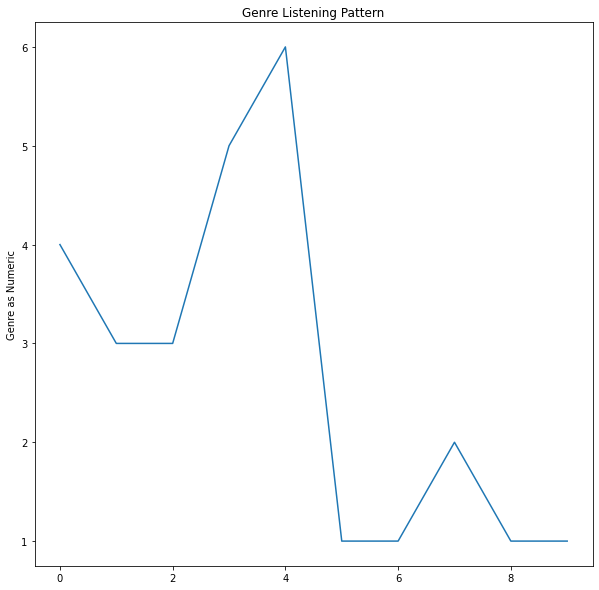

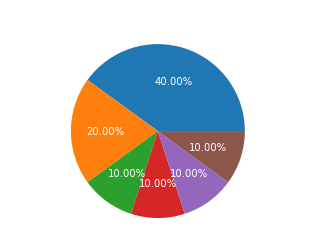

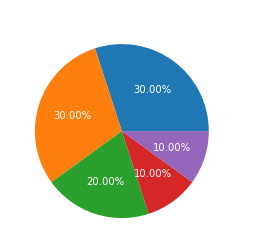

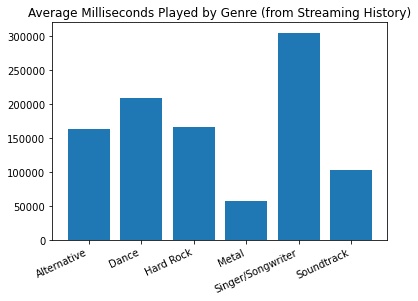

In [15]:
hist_df_slice["genres"] = hist_genres
lib_df_slice["genres"] = lib_genres



hist_by_genres = hist_df_slice.groupby("genres")

hist_genres_count = hist_df_slice["genres"].value_counts()
lib_genres_count = lib_df_slice["genres"].value_counts()

hist_msPlayed_mean = hist_by_genres["msPlayed"].mean()

# print(hist_df_slice)
# print(lib_df_slice)

print(hist_genres_count)

genre_to_numeric = {"Hard Rock": 1, "Metal": 2, "Alternative": 3, "Dance": 4, "Soundtrack": 5, "Singer/Songwriter": 6}

hist_genres_numeric = []
hist_genres_numeric_idx = []
idx = 0

for item in hist_genres:
    hist_genres_numeric.append(genre_to_numeric[item])
    hist_genres_numeric_idx.append(idx)
    idx += 1

plt.figure(figsize=(10, 10))
plt.title("Genre Listening Pattern")
plt.ylabel("Genre as Numeric")
plt.plot(hist_genres_numeric_idx, hist_genres_numeric)
plt.show()

plt.figure()
plt.rcParams.update({'text.color': 'white'})
plt.pie(hist_genres_count, labels = hist_genres_count.index, autopct="%.2f%%")
plt.title("Streaming History Genre Distribution")
plt.show

plt.figure()
plt.pie(lib_genres_count, labels = lib_genres_count.index, autopct="%.2f%%")
plt.title("Library Genre Distribution")
plt.show()

plt.figure()
plt.rcParams.update({'text.color': 'black'})
plt.bar(hist_msPlayed_mean.index, hist_msPlayed_mean)
plt.xticks(rotation=25, ha="right")
plt.title("Average Milliseconds Played by Genre (from Streaming History)")
plt.show()


## Classification Results
What attribute are you using as class information (i.e., what attribute or attributes are you predicting)  
What is the distribution of the class labels? (e.g. 50% yes, 50% no; or 70% weekday, 30% weekend, etc.)  
What are your hypotheses about the predictions  
How are you evaluating performance of your kNN and decision tree classifier? How do their results compare?  
What are challenges with classification  
 

## Conclusion
A short summary of the dataset you used  
The classification approach you developed, your classifiers’ performance, and any ideas you have on ways to improve performance.   
Describe the potential impacts of your work (including ethical impacts) for the stakeholder’s you described in the introduction.  